In [58]:
import pandas as pd # библиотека для чтения и работы с данными
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = pd.read_csv('https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv', sep='\t')
data.head()
features_list = ['Pclass','Fare'] # дополните этот список другими, важными на ваш взгляд, числовыми признаками
X, y = data[features_list], data['Survived']

clf = KNeighborsClassifier(n_neighbors=15,weights='distance') 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred) # доля правильных ответов

C:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.65625

C:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Apps\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Apps\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will alw

Достигнутая точность прогнозирования динамики деловой активности в Китае: 0.7894736842105263


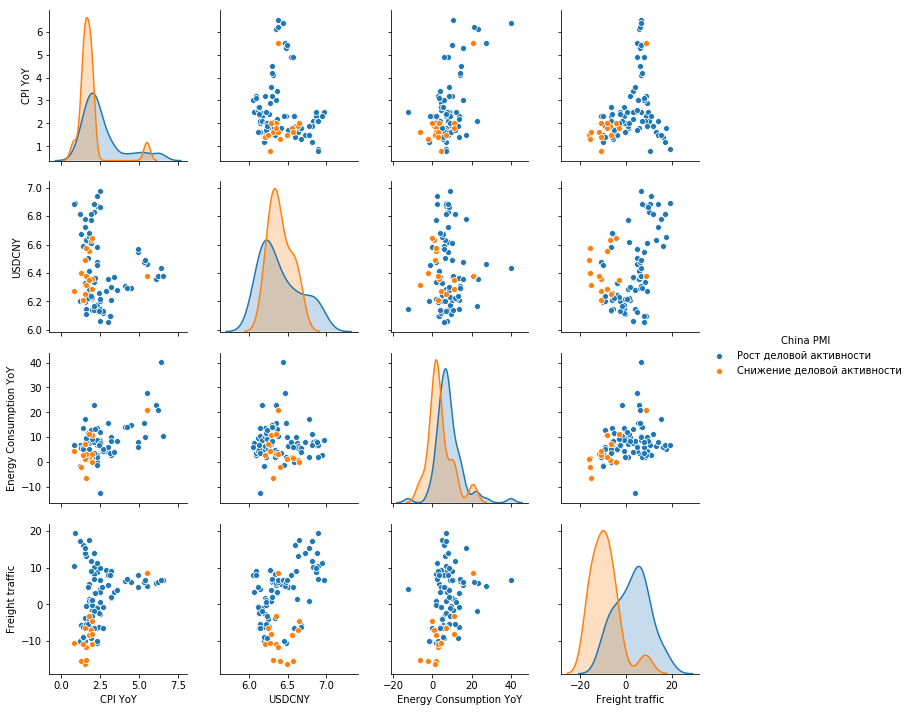

In [65]:
# Собственный датасет - прогнозирование роста или спада деловой активности в экономике Китая на месяц вперед

import seaborn as sns
import pandas as pd # библиотека для чтения и работы с данными
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Рост деловой активности отмечается, когда индикатор деловой активности PMI находится в зоне выше 50 пунктов. 
# Спад активности отмечается, когда PMI равен или ниже 50 пунктов.
# Для прогнозирования на месяц вперед значениям PMI в месяце М соответствуют значения других экономических индикаторов в предыдущем месяце.
# Для обучения классификатора используются данные об инфляции, валютном курсе, динамике потребления электроэнергии и объема грузоперевозок.
data = pd.read_excel('kNN.xlsx', sheet_name='sh0')
data.head()

# Перевод столбца значений PMI из численных в бинарные (расширение или спад деловой активности)
i = 0
for k in data['China PMI']:
    if k > 50:
        data['China PMI'][i] =  'Рост деловой активности'
    else:
        data['China PMI'][i] =  'Снижение деловой активности'
    i += 1

    
#графическое представление данных
sns.pairplot(data,'China PMI')

# составляем список признаков и столбец прогнозируемых данных
features_list = ['CPI YoY','USDCNY','Energy Consumption YoY','Freight traffic'] 
X, y = data[features_list], data['China PMI']
# настройка параметров классификатора и разметка, тестирование 
clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Достигнутая точность прогнозирования динамики деловой активности в Китае:',accuracy_score(y_test, y_pred)) # доля правильных ответов


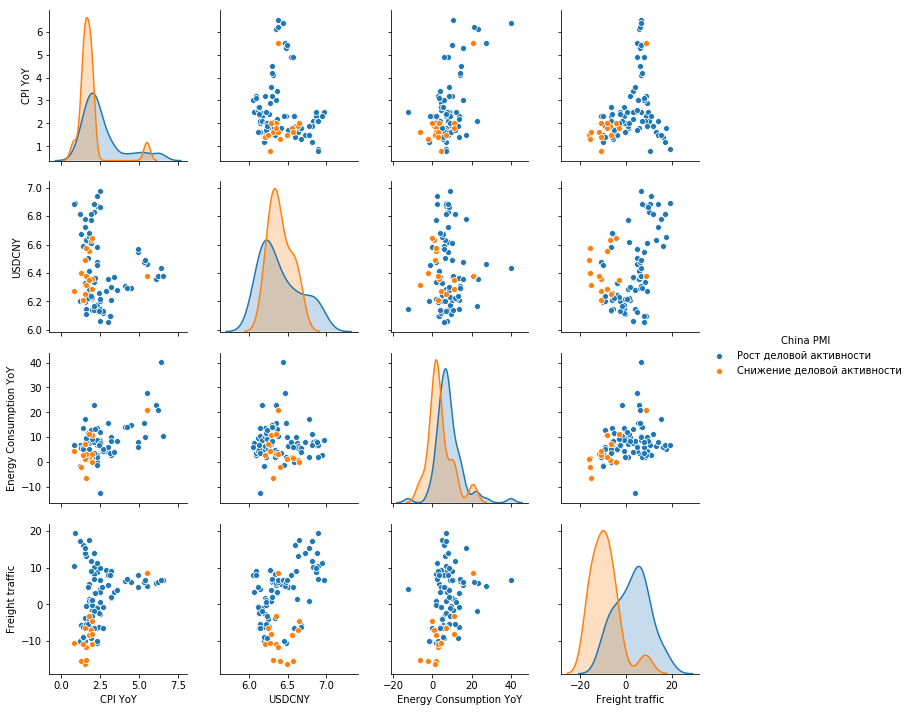

In [63]:
import seaborn as sns
sns.pairplot(data,'China PMI')